In [ ]:
# Nuevas importaciones modularizadas
from src.modeling import train_model, evaluate_model, plot_confusion_matrix, plot_feature_importances, save_model
import pandas as pd

In [3]:
# Definimos rutas para datasets procesados
processed_path = "../data/processed/"

# Cargamos datasets previamente guardados
X_train = pd.read_csv(processed_path + 'X_train_scaled.csv')
X_test = pd.read_csv(processed_path + 'X_test_scaled.csv')
y_train = pd.read_csv(processed_path + 'y_train.csv').values.ravel()  # Se convierte en array 1D
y_test = pd.read_csv(processed_path + 'y_test.csv').values.ravel()

# Verificamos la correcta carga de los datos
print("✅ Datos cargados correctamente:")
print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")


✅ Datos cargados correctamente:
Entrenamiento: (4000, 5), (4000,)
Prueba: (1000, 5), (1000,)


In [ ]:
modelo = train_model(X_train, y_train)  # Entrenamiento modularizado

✅ Modelo XGBoost entrenado exitosamente.


In [ ]:
resultados = evaluate_model(modelo, X_test, y_test)  # Evaluación modularizada
print(f"Accuracy: {resultados['accuracy']:.2f}")
print(resultados['classification_report'])

✅ Precisión del Modelo (Accuracy): 1.00

✅ Matriz de Confusión:
[[951   2]
 [  0  47]] 

✅ Reporte detallado de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       953
           1       0.96      1.00      0.98        47

    accuracy                           1.00      1000
   macro avg       0.98      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



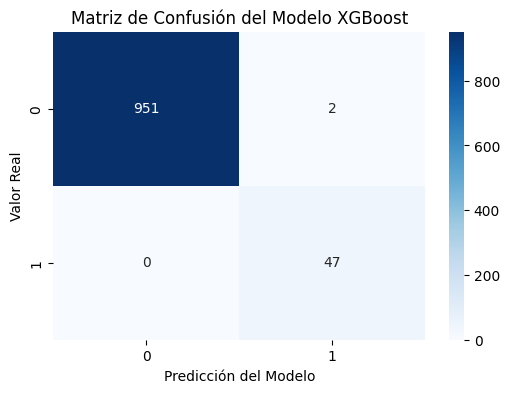

In [6]:
# Gráfica visual de la matriz de confusión para fácil interpretación
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Configuración adicional para claridad
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo XGBoost')
plt.show()


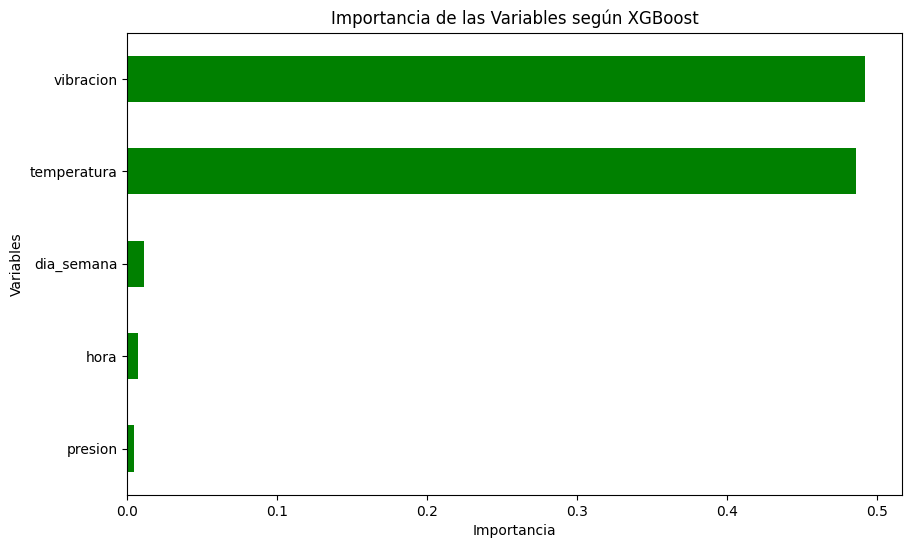

In [7]:
# Análisis gráfico de importancia de características (variables) según el modelo
plt.figure(figsize=(10, 6))
importancias = pd.Series(modelo_xgb.feature_importances_, index=X_train.columns)
importancias.sort_values(ascending=True).plot(kind='barh', color='green')

# Etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las Variables según XGBoost')
plt.show()


In [8]:
# Definimos carpeta para guardar el modelo entrenado
model_path = "../models/"
os.makedirs(model_path, exist_ok=True)     # Creamos la carpeta si no existe

# Guardamos modelo usando joblib para futura reutilización
joblib.dump(modelo_xgb, model_path + "modelo_xgboost.pkl")

print("✅ Modelo XGBoost guardado exitosamente.")

✅ Modelo XGBoost guardado exitosamente.
